In [1]:
import pandas as pd 
import numpy as np 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import tqdm
import pprint as pp

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/final_dummies_add.csv")

In [3]:
df['coms_match'].value_counts()

0    74951
1    37549
Name: coms_match, dtype: int64

In [4]:
df.columns[:20]

Index(['bill_id', 'title', 'sponsor_title', 'sponsor_name', 'sponsor_state',
       'introduced_date', 'cosponsors', 'cosponsors_by_party', 'committees',
       'summary', 'latest_major_action_date', 'congress', 'final_status_5',
       'final_status_3', 'final_status_coms', 'division', 'new_sponsor_match',
       'sponsor_party_rank', 'sponsor_senior_party_member', 'coms_match'],
      dtype='object')

In [25]:
x = df.select_dtypes([int, float, bool]).drop("law_Law", axis = 1)
y = df.final_status_5

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [26]:
train = x_train.join(y_train)
train

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_5
47255,0,105,1,21,1,False,282,0,1,1,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
88829,43,110,7,0,0,True,1259,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
33895,335,114,12,0,0,True,261,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
93618,9,111,23,0,0,True,910,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
93345,37,111,14,0,0,True,1898,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80239,21,110,3,3,1,True,168,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
101863,1,111,11,0,0,False,512,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
105743,31,106,1,5,0,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
38017,158,114,18,0,1,True,533,1,1,0,...,0,0,0,0,0,0,0,0,1,Passed one chamber


In [27]:
train.final_status_5.value_counts(normalize = True)

Referred to committee/subcommittee    0.824320
Passed one chamber                    0.056344
Referred to full chamber              0.054447
Law!                                  0.034761
Action in committee                   0.030127
Name: final_status_5, dtype: float64

In [28]:
statuses = ["Passed one chamber", "Referred to full chamber", "Action in committee", "Law!"]

In [29]:
bootstrapped = []
for status in statuses:
    sample = resample(train[train['final_status_5'] == status], replace = True, n_samples = 50_000, random_state = 13)
    bootstrapped.append(sample)

In [30]:
bootstrapped = pd.concat(bootstrapped)
bootstrapped

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_5
69061,1,112,3,0,0,False,216,0,0,1,...,0,0,0,0,0,0,0,0,0,Passed one chamber
48134,57,105,1,5,0,False,506,1,1,0,...,0,0,0,0,0,0,0,0,0,Passed one chamber
74011,0,108,2,5,1,False,283,1,1,1,...,0,0,0,0,0,0,0,0,0,Passed one chamber
6891,3,115,15,0,1,True,644,1,1,0,...,0,0,0,0,0,0,0,0,1,Passed one chamber
45440,1,105,3,0,1,False,9964,1,1,0,...,0,0,0,0,0,0,0,0,0,Passed one chamber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102717,1,106,6,0,0,False,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Law!
41250,71,114,7,0,0,True,1466,0,1,1,...,0,0,0,0,0,0,0,0,0,Law!
79210,33,110,18,0,0,True,160,0,1,1,...,0,0,0,0,0,0,0,0,0,Law!
83247,1,110,2,8,0,False,170,1,1,0,...,0,0,0,0,0,0,0,0,0,Law!


In [31]:
train_samples = pd.concat([train, bootstrapped])

In [32]:
train_samples['final_status_5'].value_counts(normalize = True)

Referred to committee/subcommittee    0.244578
Passed one chamber                    0.192542
Referred to full chamber              0.191979
Law!                                  0.186138
Action in committee                   0.184763
Name: final_status_5, dtype: float64

In [33]:
x_train = train.drop("final_status_5", axis = 1)
y_train = train.final_status_5

# Logistic Regression

In [34]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))

lr.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8344888888888888


0.8342755555555555

In [35]:
preds = lr.predict(x_test)

In [36]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '               Action in committee       0.22      0.04      0.06       793\n'
 '                              Law!       0.46      0.09      0.15       974\n'
 '                Passed one chamber       0.60      0.17      0.26      1664\n'
 'Referred to committee/subcommittee       0.85      0.98      0.91     23195\n'
 '          Referred to full chamber       0.44      0.16      0.23      1499\n'
 '\n'
 '                          accuracy                           0.83     28125\n'
 '                         macro avg       0.51      0.29      0.32     28125\n'
 '                      weighted avg       0.78      0.83      0.79     '
 '28125\n')


In [37]:
cm = confusion_matrix(y_test, preds)
cm

array([[   30,     5,     1,   732,    25],
       [    4,    84,    56,   809,    21],
       [   11,    60,   280,  1235,    78],
       [   50,    27,   103, 22833,   182],
       [   39,     8,    23,  1192,   237]])

# Random Forest Model

In [38]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))

rf.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9872118518518519


0.8513777777777778

In [39]:
preds = rf.predict(x_test)

clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '               Action in committee       0.36      0.22      0.28       793\n'
 '                              Law!       0.44      0.29      0.35       974\n'
 '                Passed one chamber       0.61      0.46      0.52      1664\n'
 'Referred to committee/subcommittee       0.89      0.96      0.93     23195\n'
 '          Referred to full chamber       0.53      0.30      0.38      1499\n'
 '\n'
 '                          accuracy                           0.85     28125\n'
 '                         macro avg       0.57      0.44      0.49     28125\n'
 '                      weighted avg       0.83      0.85      0.84     '
 '28125\n')


In [40]:
cm = confusion_matrix(y_test, preds)
cm

array([[  176,    17,    15,   543,    42],
       [   12,   281,   159,   495,    27],
       [   14,   159,   758,   697,    36],
       [  223,   139,   251, 22283,   299],
       [   59,    45,    53,   895,   447]])

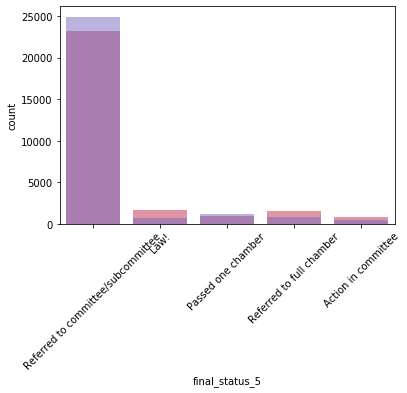

In [41]:
plt.xticks(rotation = 45)
sns.countplot(y_test, color = "crimson", alpha = .5)
sns.countplot(preds, color = "slateblue", alpha = .5);
#the model is overpredicting referred to committee. Especially bad at referred to full chamber

# Adaboost model

In [42]:
ada = AdaBoostClassifier()

ada.fit(x_train, y_train)

print(ada.score(x_train, y_train))

ada.score(x_test, y_test)

0.8313125925925926


0.8301866666666666

In [43]:
preds = ada.predict(x_test)

In [44]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '               Action in committee       0.14      0.01      0.02       793\n'
 '                              Law!       0.37      0.05      0.08       974\n'
 '                Passed one chamber       0.47      0.17      0.25      1664\n'
 'Referred to committee/subcommittee       0.85      0.99      0.91     23195\n'
 '          Referred to full chamber       0.37      0.10      0.16      1499\n'
 '\n'
 '                          accuracy                           0.83     28125\n'
 '                         macro avg       0.44      0.26      0.28     28125\n'
 '                      weighted avg       0.76      0.83      0.78     '
 '28125\n')
